In [11]:
import pickle
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import autoreload
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model, Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization, Input
from keras.models import load_model
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
data = pickle.load(open('cleaned_training.p', 'rb'))

In [3]:
from data_functions import create_training_data

In [4]:
X, Y_root, Y_vowel, Y_consonant = create_training_data(data)

In [5]:
x_train, x_test, y_train_root, y_test_root, y_train_vowel, y_test_vowel, y_train_consonant, y_test_consonant = train_test_split(X, Y_root, Y_vowel, Y_consonant, test_size=0.05, random_state=42)
y_train = [y_train_root, y_train_vowel, y_train_consonant]
y_test = [y_test_root, y_test_vowel, y_test_consonant]

In [6]:
inputs = Input(shape = (64, 64, 1))

model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(64, 64, 1))(inputs)
model = MaxPool2D(pool_size=(3, 3))(model)
model = Conv2D(filters=16, kernel_size= (3,3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Dropout(rate=0.1)(model)

model = Flatten()(model)
model = Dense(1024, activation = "relu")(model)
model = Dense(512, activation = 'relu')(model)
dense = Dense(256, activation = 'relu')(model)

root = Dense(168, activation = 'softmax')(dense)
vowel = Dense(11, activation = 'softmax')(dense)
consonant = Dense(7, activation = 'softmax')(dense)

model = Model(inputs=inputs, outputs=[root, vowel, consonant])

In [8]:
from create_models import ModelEvaluation

In [8]:
mymodel = ModelEvaluation(model)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 21, 21, 32)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 21, 21, 16)   4624        max_pooling2d_1[0][0]            
____________________________________________________________________________________________

In [9]:
mymodel.train(x_train, y_train, epochs= 32, batch_size= 256, validation_split= 0.1)

Train on 171718 samples, validate on 19080 samples
Epoch 1/32
171718/171718 [==============================] - 35s 205us/step - loss: 4.9145 - dense_4_loss: 3.5550 - dense_5_loss: 0.7126 - dense_6_loss: 0.6465 - dense_4_accuracy: 0.1663 - dense_5_accuracy: 0.7493 - dense_6_accuracy: 0.7703 - val_loss: 3.5272 - val_dense_4_loss: 2.5732 - val_dense_5_loss: 0.4898 - val_dense_6_loss: 0.4649 - val_dense_4_accuracy: 0.3264 - val_dense_5_accuracy: 0.8283 - val_dense_6_accuracy: 0.8292
Epoch 2/32
171718/171718 [==============================] - 32s 186us/step - loss: 3.0212 - dense_4_loss: 2.2028 - dense_5_loss: 0.4134 - dense_6_loss: 0.4050 - dense_4_accuracy: 0.3983 - dense_5_accuracy: 0.8564 - dense_6_accuracy: 0.8553 - val_loss: 2.6127 - val_dense_4_loss: 1.8735 - val_dense_5_loss: 0.3664 - val_dense_6_loss: 0.3733 - val_dense_4_accuracy: 0.4713 - val_dense_5_accuracy: 0.8722 - val_dense_6_accuracy: 0.8688
Epoch 3/32
171718/171718 [==============================] - 32s 187us/step - loss: 

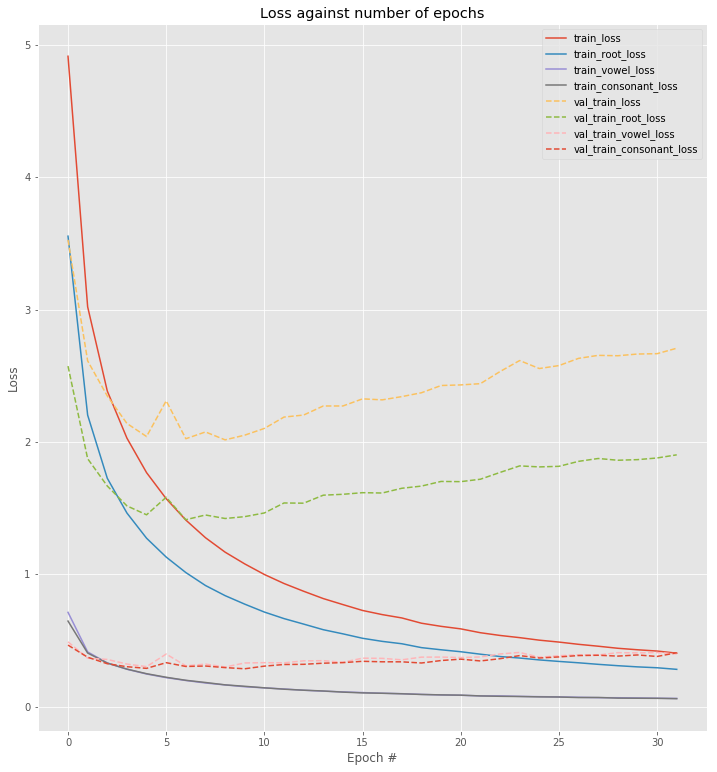

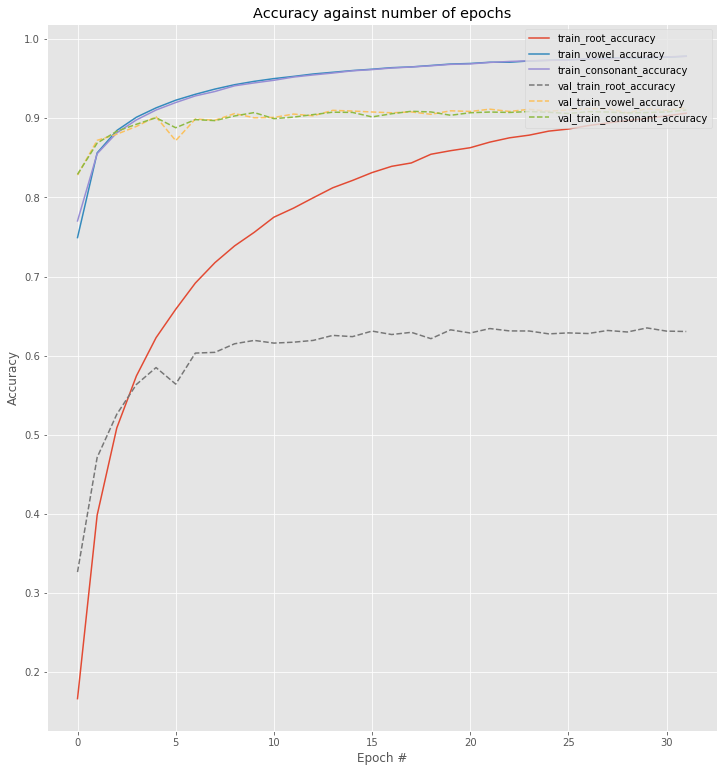

In [11]:
mymodel.plot_metrics()

In [12]:
mymodel.save_model()

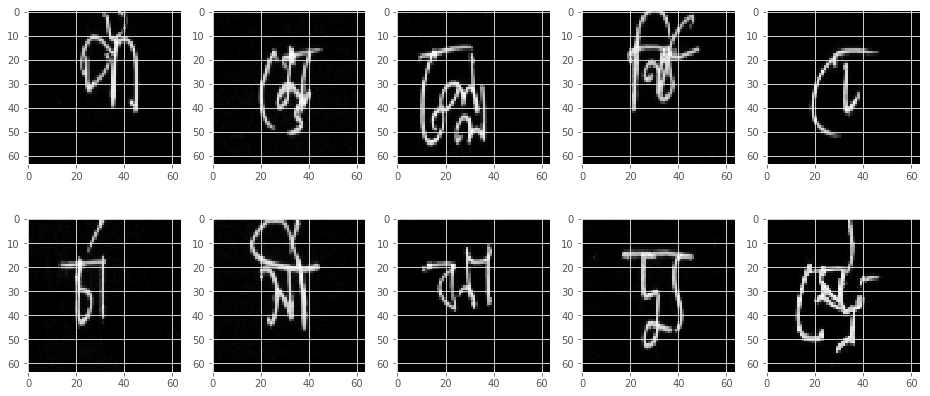

predicted                 true                
             root vowel consonant root vowel consonant
image_0        96     1         1   96     1         1
image_1       151     7         0  119     7         0
image_2        93     7         0  132     7         0
image_3        84     2         2   84     2         0
image_4        58     7         0   58     7         0
image_5        38     1         2   38     1         2
image_6       147     3         2  147     3         2
image_7        48     1         0   48     1         0
image_8        72     4         4   72     4         4
image_9       149     7         0  141     7         5

In [13]:
mymodel.test(x_test, y_test, 10)

In [14]:
mymodel.evaluation(x_test, y_test)

10042/10042 [==============================] - 3s 295us/step
[('loss', 2.685628789754722), ('dense_4_loss', 1.8782336711883545), ('dense_5_loss', 0.3919994831085205), ('dense_6_loss', 0.4161245822906494), ('dense_4_accuracy', 0.6309500336647034), ('dense_5_accuracy', 0.9144592881202698), ('dense_6_accuracy', 0.9082852005958557)]


In [ ]:
inputs = Input(shape = (64, 64, 1))

model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(64, 64, 1))(inputs)
model = Conv2D(filters=32, kernel_size= (3,3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Conv2D(filters=32, kernel_size= (5,5), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Dropout(rate=0.2)(model)

model = Flatten()(model)
model = Dense(1024, activation = "relu")(model)
model = Dropout(rate=0.3)(model)
dense = Dense(512, activation = 'relu')(model)

root = Dense(168, activation = 'softmax')(dense)
vowel = Dense(11, activation = 'softmax')(dense)
consonant = Dense(7, activation = 'softmax')(dense)

model = Model(inputs=inputs, outputs=[root, vowel, consonant])

In [9]:
mymodel = ModelEvaluation(model)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 64, 64, 32)   9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 64, 64, 32)   128         conv2d_2[0][0]                   
____________________________________________________________________________________________

In [ ]:
mymodel.train(x_train, y_train, epochs= 16, batch_size= 256, validation_split= 0.1)

Train on 171718 samples, validate on 19080 samples
Epoch 1/16
171718/171718 [==============================] - 168s 978us/step - loss: 6.2883 - dense_3_loss: 4.2553 - dense_4_loss: 1.1334 - dense_5_loss: 0.8991 - dense_3_accuracy: 0.0747 - dense_4_accuracy: 0.6525 - dense_5_accuracy: 0.7137 - val_loss: 4.3074 - val_dense_3_loss: 3.2581 - val_dense_4_loss: 0.5793 - val_dense_5_loss: 0.4699 - val_dense_3_accuracy: 0.1749 - val_dense_4_accuracy: 0.8040 - val_dense_5_accuracy: 0.8374
Epoch 2/16
171718/171718 [==============================] - 161s 936us/step - loss: 4.1626 - dense_3_loss: 3.0386 - dense_4_loss: 0.6249 - dense_5_loss: 0.4989 - dense_3_accuracy: 0.2158 - dense_4_accuracy: 0.7807 - dense_5_accuracy: 0.8274 - val_loss: 2.9465 - val_dense_3_loss: 2.1923 - val_dense_4_loss: 0.4127 - val_dense_5_loss: 0.3431 - val_dense_3_accuracy: 0.3958 - val_dense_4_accuracy: 0.8596 - val_dense_5_accuracy: 0.8854
Epoch 3/16
171718/171718 [==============================] - 161s 936us/step - los

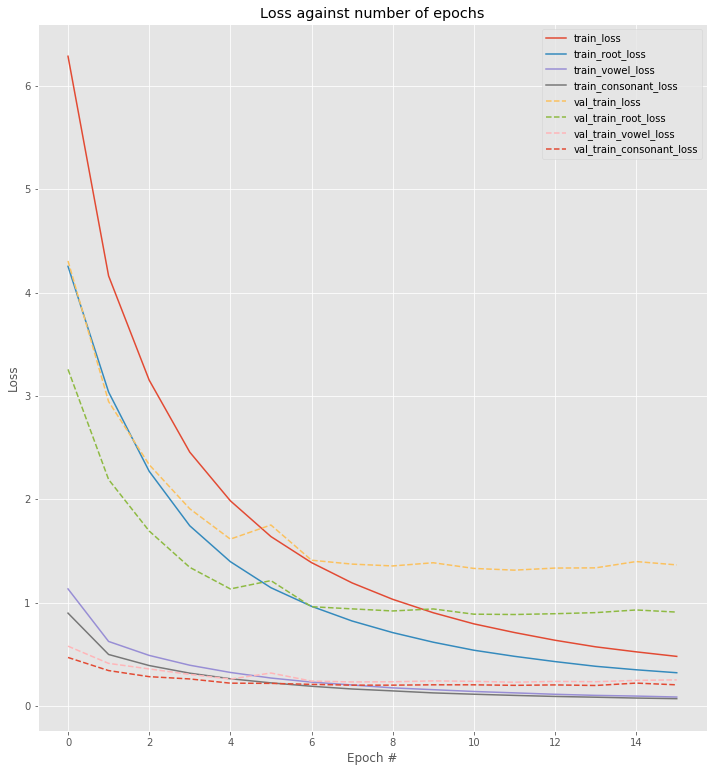

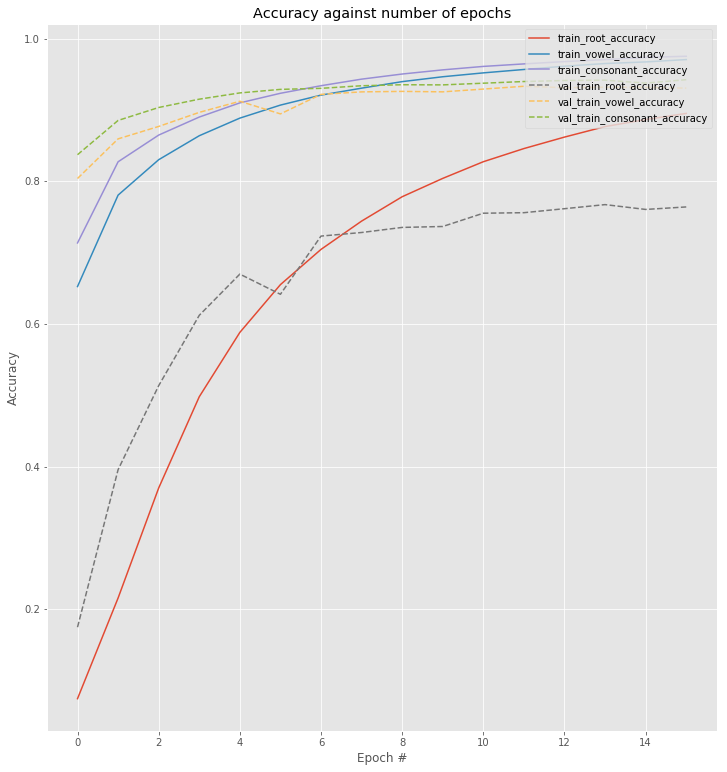

In [14]:
mymodel.plot_metrics()

In [15]:
mymodel.save_model()

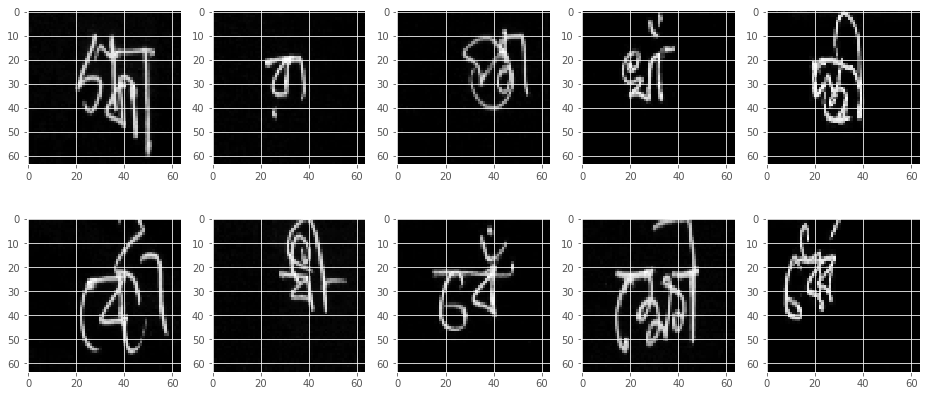

predicted                 true                
             root vowel consonant root vowel consonant
image_0        24     1         0   24     1         0
image_1       123     1         0  123     1         0
image_2       150     1         0   98     1         0
image_3        22     1         1   22     1         1
image_4       150     3         0  150     3         0
image_5        15     9         0   15     9         0
image_6        69     3         0   79     3         0
image_7       107     7         1  107     7         1
image_8        18    10         0   18    10         0
image_9        80     7         2   80     7         2

In [16]:
mymodel.test(x_test, y_test, 10)

In [17]:
mymodel.evaluation(x_test, y_test)

10042/10042 [==============================] - 5s 528us/step
[('loss', 1.328931080157765), ('dense_3_loss', 0.8756951689720154), ('dense_4_loss', 0.2402048259973526), ('dense_5_loss', 0.21351389586925507), ('dense_3_accuracy', 0.7681736946105957), ('dense_4_accuracy', 0.9368651509284973), ('dense_5_accuracy', 0.9411472082138062)]


In [18]:
inputs = Input(shape = (64, 64, 1))

model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(64, 64, 1))(inputs)
model = Conv2D(filters=32, kernel_size= (3,3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Conv2D(filters=32, kernel_size= (5,5), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Dropout(rate=0.2)(model)

model = Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Conv2D(filters=64, kernel_size= (5,5), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Dropout(rate=0.2)(model)


model = Flatten()(model)
model = Dense(1024, activation = "relu")(model)
model = Dropout(rate=0.3)(model)
dense = Dense(512, activation = 'relu')(model)

root = Dense(168, activation = 'softmax')(dense)
vowel = Dense(11, activation = 'softmax')(dense)
consonant = Dense(7, activation = 'softmax')(dense)

model = Model(inputs=inputs, outputs=[root, vowel, consonant])

In [19]:
mymodel = ModelEvaluation(model)

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 64, 64, 32)   320         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 64, 64, 32)   9248        conv2d_4[0][0]                   
__________________________________________________________________________________________________
batch_normalization_3 (BatchNor (None, 64, 64, 32)   128         conv2d_5[0][0]                   
____________________________________________________________________________________________

In [20]:
mymodel.train(x_train, y_train, epochs= 32, batch_size= 256, validation_split= 0.1)

Train on 171718 samples, validate on 19080 samples
Epoch 1/32
171718/171718 [==============================] - 199s 1ms/step - loss: 4.7793 - dense_8_loss: 3.4155 - dense_9_loss: 0.7346 - dense_10_loss: 0.6285 - dense_8_accuracy: 0.1942 - dense_9_accuracy: 0.7565 - dense_10_accuracy: 0.7913 - val_loss: 4.7093 - val_dense_8_loss: 3.0025 - val_dense_9_loss: 0.9062 - val_dense_10_loss: 0.8006 - val_dense_8_accuracy: 0.3076 - val_dense_9_accuracy: 0.7293 - val_dense_10_accuracy: 0.7432
Epoch 2/32
171718/171718 [==============================] - 197s 1ms/step - loss: 2.0866 - dense_8_loss: 1.4814 - dense_9_loss: 0.3299 - dense_10_loss: 0.2751 - dense_8_accuracy: 0.5697 - dense_9_accuracy: 0.8891 - dense_10_accuracy: 0.9074 - val_loss: 1.5467 - val_dense_8_loss: 1.0443 - val_dense_9_loss: 0.2625 - val_dense_10_loss: 0.2394 - val_dense_8_accuracy: 0.6907 - val_dense_9_accuracy: 0.9153 - val_dense_10_accuracy: 0.9210
Epoch 3/32
171718/171718 [==============================] - 197s 1ms/step - l

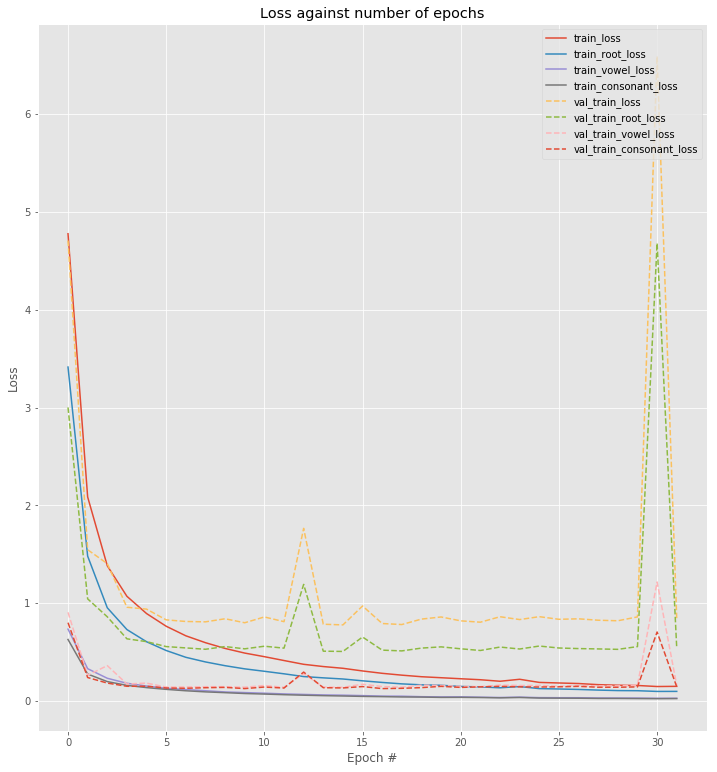

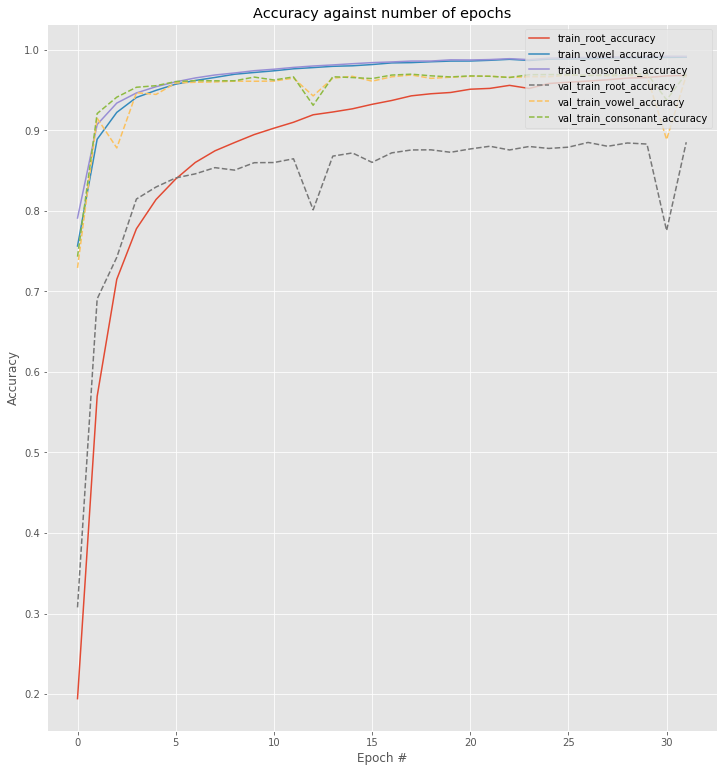

In [21]:
mymodel.plot_metrics()

In [22]:
mymodel.save_model()

In [25]:
inputs = Input(shape = (64, 64, 1))

model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(64, 64, 1))(inputs)
model = Conv2D(filters=32, kernel_size= (3,3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Conv2D(filters=32, kernel_size= (5,5), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Dropout(rate=0.2)(model)

model = Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Conv2D(filters=64, kernel_size= (5,5), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Dropout(rate=0.2)(model)


model = Flatten()(model)
model = Dense(1024, activation = "relu")(model)
model = Dropout(rate=0.3)(model)
dense = Dense(512, activation = 'relu')(model)

root = Dense(168, activation = 'softmax')(dense)
vowel = Dense(11, activation = 'softmax')(dense)
consonant = Dense(7, activation = 'softmax')(dense)

model = Model(inputs=inputs, outputs=[root, vowel, consonant])

In [26]:
mymodel= ModelEvaluation(model)

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 64, 64, 32)   320         input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 64, 64, 32)   9248        conv2d_14[0][0]                  
__________________________________________________________________________________________________
batch_normalization_11 (BatchNo (None, 64, 64, 32)   128         conv2d_15[0][0]                  
____________________________________________________________________________________________

In [27]:
mymodel.train(x_train, y_train, epochs= 25, batch_size= 256, validation_split= 0.1)

Train on 171718 samples, validate on 19080 samples
Epoch 1/25
171718/171718 [==============================] - 199s 1ms/step - loss: 4.7346 - dense_18_loss: 3.3566 - dense_19_loss: 0.7192 - dense_20_loss: 0.6582 - dense_18_accuracy: 0.2048 - dense_19_accuracy: 0.7620 - dense_20_accuracy: 0.7825 - val_loss: 2.8903 - val_dense_18_loss: 2.1058 - val_dense_19_loss: 0.4458 - val_dense_20_loss: 0.3389 - val_dense_18_accuracy: 0.4330 - val_dense_19_accuracy: 0.8619 - val_dense_20_accuracy: 0.8905
Epoch 2/25
171718/171718 [==============================] - 197s 1ms/step - loss: 2.0548 - dense_18_loss: 1.4577 - dense_19_loss: 0.3183 - dense_20_loss: 0.2789 - dense_18_accuracy: 0.5746 - dense_19_accuracy: 0.8934 - dense_20_accuracy: 0.9055 - val_loss: 1.4415 - val_dense_18_loss: 0.9887 - val_dense_19_loss: 0.2628 - val_dense_20_loss: 0.1923 - val_dense_18_accuracy: 0.7083 - val_dense_19_accuracy: 0.9155 - val_dense_20_accuracy: 0.9351
Epoch 3/25
171718/171718 [==============================] - 1

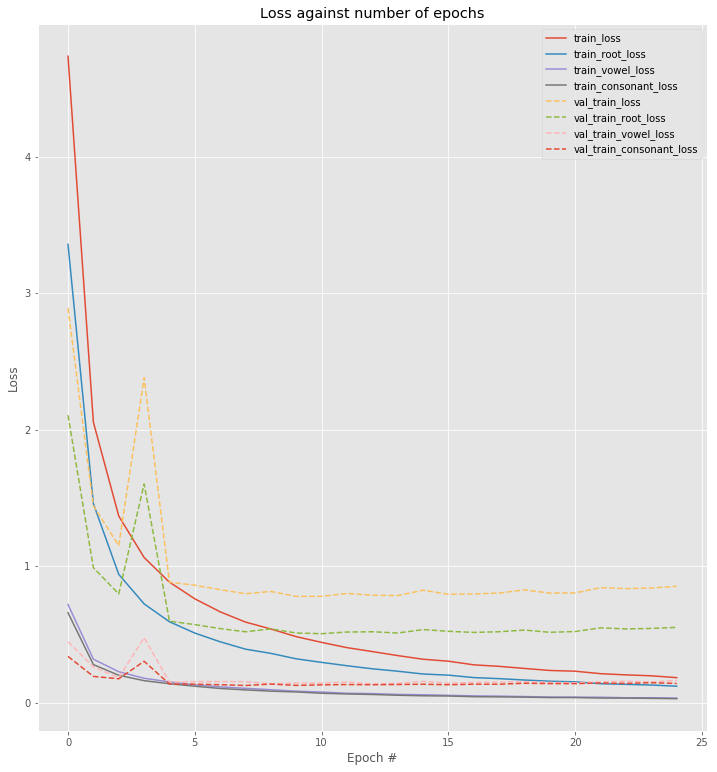

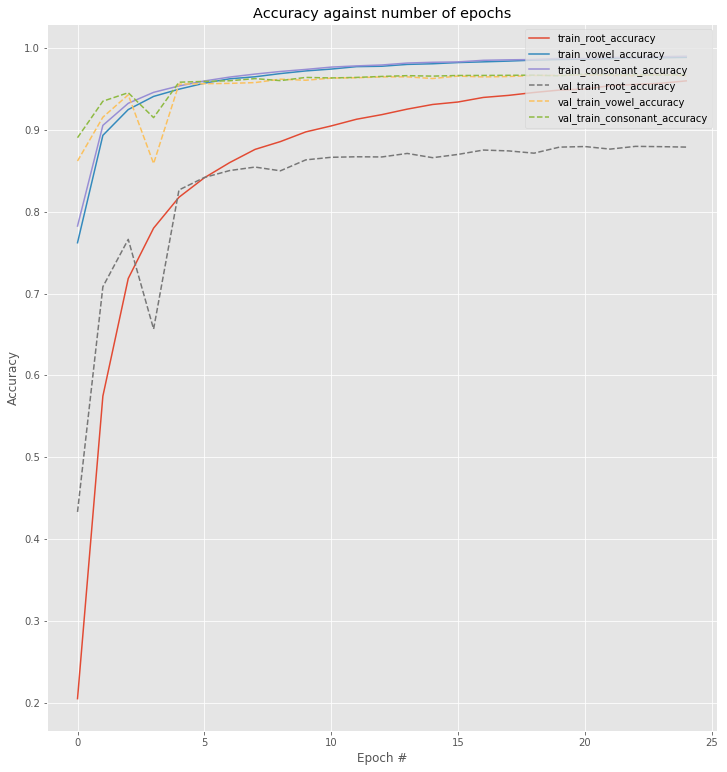

In [29]:
mymodel.plot_metrics()

In [30]:
mymodel.save_model()

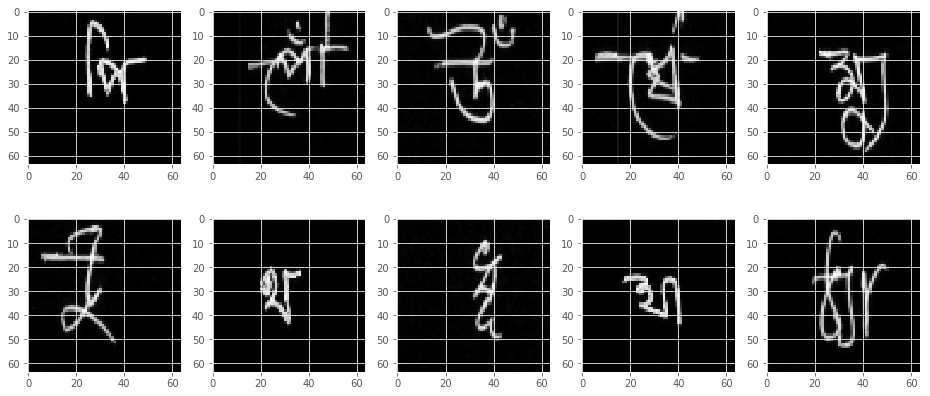

predicted                 true                
             root vowel consonant root vowel consonant
image_0        96     2         0   96     2         0
image_1        96    10         1   96    10         1
image_2         6     0         1    6     0         1
image_3       139     7         2  139     7         2
image_4       115     4         4  115     4         4
image_5        53     4         0   53     4         0
image_6        71     0         0   71     0         0
image_7        79     5         0   79     5         0
image_8        71     1         0   71     1         0
image_9        55     1         4   55     1         4

In [31]:
mymodel.test(x_test, y_test, 10)

In [32]:
mymodel.evaluation(x_test, y_test)

10042/10042 [==============================] - 6s 608us/step
[('loss', 0.7963893579634815), ('dense_18_loss', 0.5123857855796814), ('dense_19_loss', 0.1521494835615158), ('dense_20_loss', 0.13217388093471527), ('dense_18_accuracy', 0.8838876485824585), ('dense_19_accuracy', 0.9680342674255371), ('dense_20_accuracy', 0.9701254963874817)]


In [30]:
inputs = Input(shape = (64, 64, 1))

model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(64, 64, 1))(inputs)
model = Conv2D(filters=32, kernel_size= (3,3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Conv2D(filters=32, kernel_size= (5,5), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Dropout(rate=0.2)(model)

model = Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Conv2D(filters=64, kernel_size= (5,5), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Dropout(rate=0.2)(model)

model = Conv2D(filters=128, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Conv2D(filters=128, kernel_size= (5,5), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Dropout(rate=0.2)(model)

model = Flatten()(model)
model = Dense(1024, activation = "relu")(model)
model = Dropout(rate=0.3)(model)
dense = Dense(512, activation = 'relu')(model)

root = Dense(168, activation = 'softmax')(dense)
vowel = Dense(11, activation = 'softmax')(dense)
consonant = Dense(7, activation = 'softmax')(dense)

model = Model(inputs=inputs, outputs=[root, vowel, consonant])

model.compile(optimizer= 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [31]:
hist = model.fit(x_train, [y_train_root, y_train_vowel, y_train_consonant],
          epochs = 32,
          batch_size= 256,
          validation_split= 0.1)

Train on 171718 samples, validate on 19080 samples
Epoch 1/32
171718/171718 [==============================] - 238s 1ms/step - loss: 5.8012 - dense_23_loss: 4.0390 - dense_24_loss: 0.9354 - dense_25_loss: 0.8261 - dense_23_accuracy: 0.0908 - dense_24_accuracy: 0.6892 - dense_25_accuracy: 0.7345 - val_loss: 3.5119 - val_dense_23_loss: 2.7135 - val_dense_24_loss: 0.4169 - val_dense_25_loss: 0.3825 - val_dense_23_accuracy: 0.2628 - val_dense_24_accuracy: 0.8591 - val_dense_25_accuracy: 0.8720
Epoch 2/32
171718/171718 [==============================] - 236s 1ms/step - loss: 2.6880 - dense_23_loss: 1.9835 - dense_24_loss: 0.3843 - dense_25_loss: 0.3199 - dense_23_accuracy: 0.4344 - dense_24_accuracy: 0.8714 - dense_25_accuracy: 0.8918 - val_loss: 1.4336 - val_dense_23_loss: 1.0157 - val_dense_24_loss: 0.2251 - val_dense_25_loss: 0.1935 - val_dense_23_accuracy: 0.6969 - val_dense_24_accuracy: 0.9283 - val_dense_25_accuracy: 0.9383
Epoch 3/32
171718/171718 [==============================] - 2

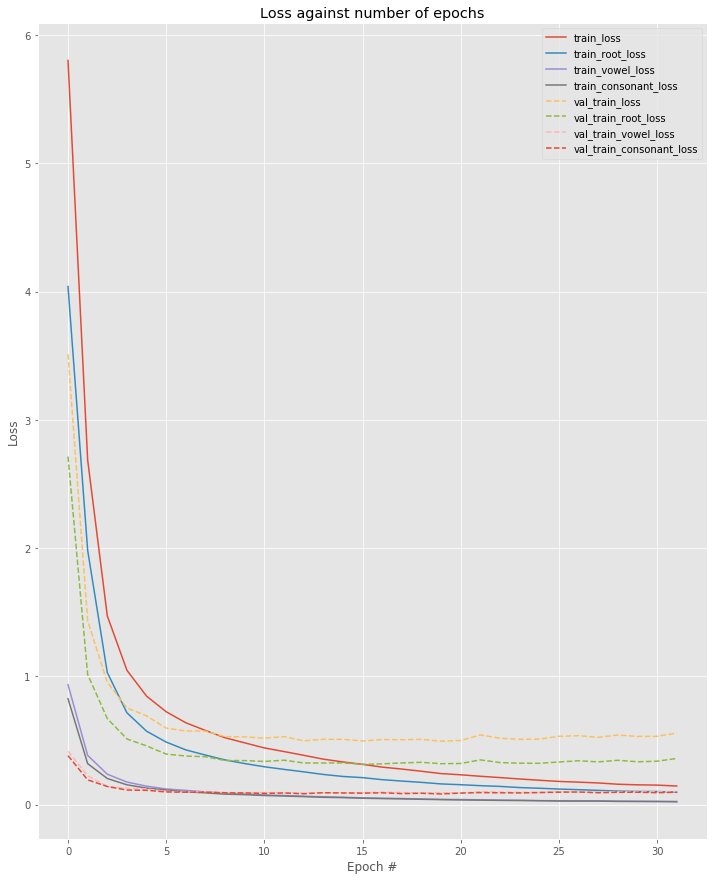

In [37]:
plot_loss(model, hist)

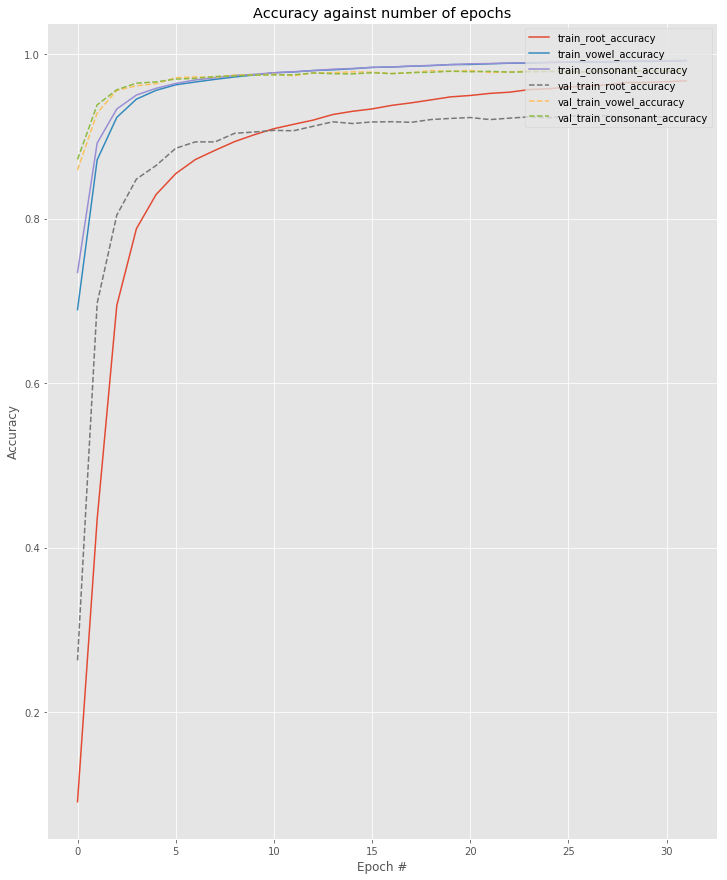

In [38]:
plot_accuracy(model, hist)

In [39]:
# model.save('model_9.h5')
print('Model saved to disk')
# pickle.dump(hist, open('model_9_history.p', 'wb'))

Model saved to disk


In [14]:
model= load_model('model_9.h5')
hist = pickle.load(open('model_9_history.p', 'rb'))

In [15]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 64, 64, 32)   320         input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 64, 64, 32)   9248        conv2d_21[0][0]                  
__________________________________________________________________________________________________
batch_normalization_17 (BatchNo (None, 64, 64, 32)   128         conv2d_22[0][0]                  
____________________________________________________________________________________________

In [15]:
model.evaluate(x_test, [y_test_root, y_test_vowel, y_test_consonant])

10042/10042 [==============================] - 13s 1ms/step


[0.5500095403038916,
 0.35069772601127625,
 0.10413545370101929,
 0.09530599415302277,
 0.9235212206840515,
 0.9796853065490723,
 0.9808803200721741]

In [17]:
dict(zip(model.metrics_names,model.evaluate(x_test, [y_test_root, y_test_vowel, y_test_consonant])))

10042/10042 [==============================] - 8s 758us/step


{'dense_23_accuracy': 0.9235212206840515,
 'dense_23_loss': 0.35069772601127625,
 'dense_24_accuracy': 0.9796853065490723,
 'dense_24_loss': 0.10413545370101929,
 'dense_25_accuracy': 0.9808803200721741,
 'dense_25_loss': 0.09530599415302277,
 'loss': 0.5500095388556211}

In [37]:
model.predict(x_test[:2])

[array([[0.00000000e+00, 0.00000000e+00, 7.01879860e-32, 1.71795145e-25,
         2.79152113e-26, 6.35993406e-29, 0.00000000e+00, 1.54402829e-30,
         2.06667996e-32, 0.00000000e+00, 0.00000000e+00, 3.89907597e-32,
         1.08415850e-35, 5.76107801e-24, 1.21860386e-27, 5.88006762e-30,
         1.11018140e-21, 1.01225224e-35, 2.14827555e-19, 4.04596898e-21,
         1.14920904e-27, 6.59328454e-29, 7.77863604e-21, 2.69323343e-21,
         5.49208157e-24, 8.51790486e-29, 1.03147811e-33, 3.02280704e-30,
         9.36556498e-26, 3.18615555e-12, 5.94046035e-25, 5.71967923e-28,
         9.78078829e-19, 3.44560916e-26, 7.90780487e-26, 6.20410582e-21,
         2.18666498e-18, 4.98585941e-22, 4.86587680e-26, 5.29865485e-24,
         1.21126623e-10, 4.01083695e-15, 7.51485976e-18, 4.17166803e-19,
         7.02145717e-15, 4.10276662e-18, 4.83949525e-27, 3.64854259e-28,
         2.50585861e-32, 1.86931556e-37, 4.74897572e-32, 5.54503432e-21,
         1.14120057e-21, 2.97029772e-28, 1.12405084

In [64]:
np.argmax(model.predict(x_test[:5])[0], axis= 1)

array([151,  23,  81,  38,  32])

In [63]:
np.argmax(y_test_root[:5], axis= 1)

array([151,  23,  81, 107,  32])

In [47]:
np.argmax(model.predict(x_test[:5])[1], axis= 1)

array([5, 7, 1, 8, 7])

In [48]:
np.argmax(y_test_vowel[:5], axis= 1)

array([5, 7, 1, 8, 7])

In [49]:
np.argmax(model.predict(x_test[:5])[2], axis= 1)

array([0, 2, 4, 0, 0])

In [50]:
np.argmax(y_test_consonant[:5], axis= 1)

array([0, 2, 4, 0, 0])

In [115]:
idxs = np.random.choice(len(x_test), 16, replace= False)

In [112]:
x_test[idxs[0]].reshape(64,64)*255

array([[247., 247., 249., ..., 248., 249., 248.],
       [251., 248., 250., ..., 247., 251., 248.],
       [249., 250., 251., ..., 246., 248., 249.],
       ...,
       [250., 246., 251., ..., 251., 250., 251.],
       [250., 251., 250., ..., 251., 249., 246.],
       [250., 248., 251., ..., 249., 249., 248.]])

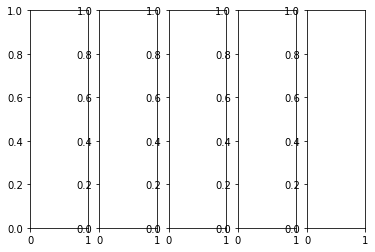

In [81]:
fig, ax = plt.subplots(nrows = 1, ncols= 5)

In [84]:
ax.reshape(1,5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c7036a898>,
      dtype=object)

In [97]:
nrows = int(np.ceil(16/5))

In [98]:
nrows

4

In [103]:
ncols = 5

In [104]:
ncols

5

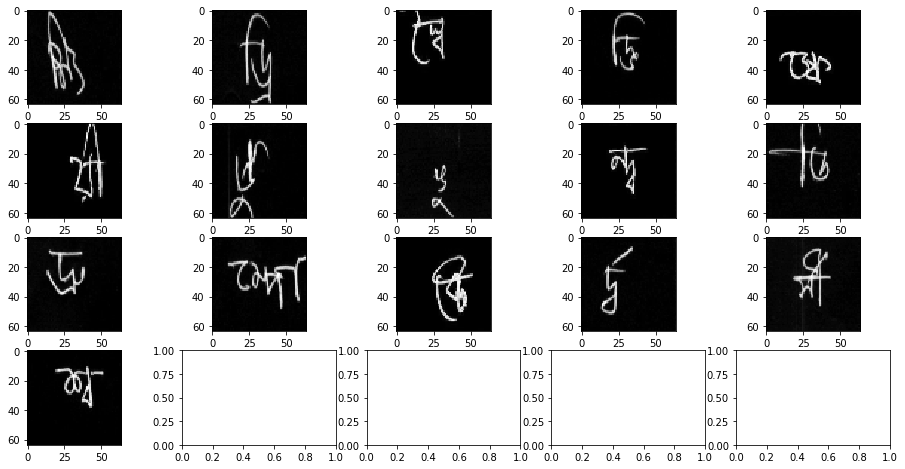

In [125]:
fig, ax = plt.subplots(nrows, ncols, figsize= (16,8))
for i,idx in enumerate(idxs):
    img = x_test[idx].reshape(64,64)
    ax.flatten()[i].imshow(img, cmap= 'gist_gray_r')

In [10]:
from data_functions import show_sample_imgs

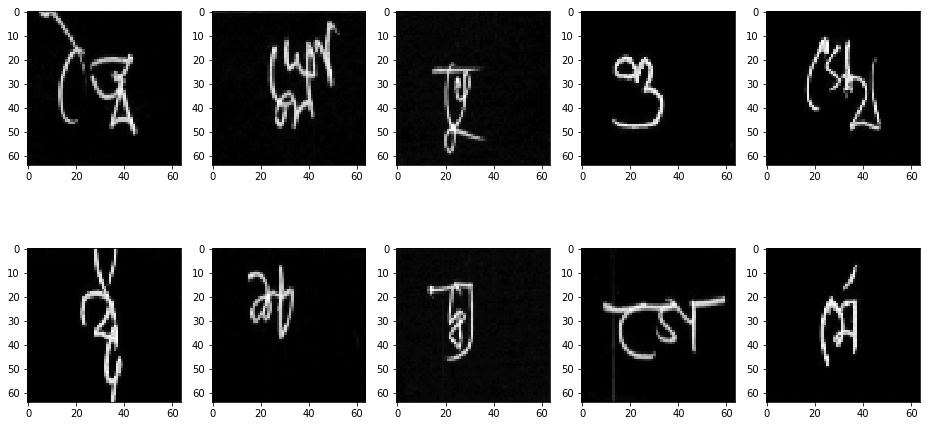

In [13]:
idxs = show_sample_imgs(x_test, 10)

In [14]:
idxs

array([7644, 1160, 7242, 3695, 2974, 4106, 9344, 7580, 1947, 5387])

In [16]:
y_test = [y_test_root, y_test_vowel, y_test_consonant]

In [17]:
y_root = np.argmax(y_test[0][idxs], axis= 1)
y_vowel = np.argmax(y_test[1][idxs], axis= 1)
y_consonant = np.argmax(y_test[2][idxs], axis= 1)

In [18]:
print(y_root, y_vowel, y_consonant)

[155 157 113  62 151  79 134  76  23 115] [8 9 4 0 7 5 0 0 7 7] [0 0 0 0 0 0 0 4 0 2]


In [19]:
root_probas = model.predict(x_test[idxs])[0]
vowel_probas = model.predict(x_test[idxs])[1]
consonant_probas = model.predict(x_test[idxs])[2]
root_pred = np.argmax(root_probas, axis= 1)
vowel_pred = np.argmax(vowel_probas, axis= 1)
consonant_pred = np.argmax(consonant_probas, axis= 1)

In [20]:
print(root_pred, vowel_pred, consonant_pred)

[155 157 113  62 151  79 134  76  23 115] [8 9 4 0 7 5 0 0 7 7] [0 0 0 0 0 0 0 4 0 2]


In [30]:
pd.DataFrame([root_pred, vowel_pred, consonant_pred, y_root, y_vowel, y_consonant], index= pd.MultiIndex.from_arrays(arrays), columns= ['image_{}'.format(i) for i in range(len(y_root))]).T

predicted                 true                
             root vowel consonant root vowel consonant
image_0       155     8         0  155     8         0
image_1       157     9         0  157     9         0
image_2       113     4         0  113     4         0
image_3        62     0         0   62     0         0
image_4       151     7         0  151     7         0
image_5        79     5         0   79     5         0
image_6       134     0         0  134     0         0
image_7        76     0         4   76     0         4
image_8        23     7         0   23     7         0
image_9       115     7         2  115     7         2

In [6]:
columns = [['predicted', 'true'],
          ['root', 'vowel', 'consonant',]]
pd.MultiIndex.from_product(columns)

MultiIndex([('predicted',      'root'),
            ('predicted',     'vowel'),
            ('predicted', 'consonant'),
            (     'true',      'root'),
            (     'true',     'vowel'),
            (     'true', 'consonant')],
           )